In [1]:
# Import libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import pickle
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications.imagenet_utils import decode_predictions

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, accuracy_score

2022-12-15 03:54:07.446555: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-15 03:54:08.003180: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mark/Python/anaconda3/lib/python3.7/site-packages/cv2/../../lib64:
2022-12-15 03:54:08.003294: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-15 03:54:09.481055: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'

## In this notebook, I will validate my CNN using a seperated validation set made from the training data of 200 images per class

### Load in validation data

In [3]:
# Function to create image validation data
# Extracts data from given directory, loads, resizes, and change images to grayscale
# Reshape data and create y labels
## code for this function was adapted from code found at https://towardsdatascience.com/loading-custom-image-dataset-for-deep-learning-models-part-1-d64fa7aaeca6

def create_validation_data(img_dir):
    img_data = []
    labels = []
    for dir in sorted(os.listdir(img_dir)):
        for file in os.listdir(os.path.join(img_dir, dir)):
            img_path = os.path.join(img_dir, dir, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (50, 50), interpolation = cv2.INTER_AREA)
            img = np.array(img)
            img = img.astype('float32')
            #img /= 255
            img_data.append(img)
            labels.append(dir)
    X_val = np.array(img_data, np.float32)
    X_val = X_val.reshape(-1, 50, 50, 1)
    y_val = np.array(labels)
    return X_val, y_val

In [4]:
# validation filepath
val_path = '../image_data/validation_images/'

In [5]:
# Load in validation data
X_val, y_val = create_validation_data(val_path)

### Load in CNNs

In [19]:
# Load in trained CNNs for evaluation
filepath = '../models/'
model1 = pickle.load(open(filepath + 'cnn_2layer.pkl', 'rb'))
model2 = pickle.load(open(filepath + 'cnn_3layer.pkl', 'rb'))
model3 = pickle.load(open(filepath + 'cnn_3layer64.pkl', 'rb'))
model4 = pickle.load(open(filepath + 'cnn_3layer32dropout.pkl', 'rb'))
model5 = pickle.load(open(filepath + 'cnn_3layer64dropout.pkl', 'rb'))
model6 = pickle.load(open(filepath + 'cnn_3layer_reduced.pkl', 'rb'))

Keras model archive loading:
File Name                                             Modified             Size
metadata.json                                  2022-12-13 22:04:10           64
variables.h5                                   2022-12-13 22:04:10       983824
config.json                                    2022-12-13 22:04:10         2670
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......dense
.........vars
............0
............1
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
...vars
Keras model archive loading:
File Name                                

In [22]:
# Summarize loaded model
model5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 11, 11, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 9, 9, 64)         

In [8]:
# Dictionary to translate model output to labels
math_dict = {0: '+', 1: '-', 2: '0', 3: '1', 4: '2', 5: '3', 6: '4', 7: '5',
             8: '6', 9: '7', 10: '8', 11: '9', 12: 'times', }

### Compute Validation Accuracies

In [20]:
# Predict validation set, convert to labels, and calculate accuracy
y_pred = np.argmax(model1.predict(X_val), axis=1)

y_predicted = []
for char in y_pred:
    y_predicted.append(math_dict[char])
    
print(f'validation accuracy of model: {accuracy_score(y_val, y_predicted)}')

 6/82 [=>............................] - ETA: 0s

2022-12-14 21:07:23.814979: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 26000000 exceeds 10% of free system memory.


82/82 [==============================] - 1s 12ms/step
validation accuracy of model: 0.9719230769230769


In [120]:
# Predict validation set, convert to labels, and calculate accuracy
y_pred = np.argmax(model2.predict(X_val), axis=1)

y_predicted = []
for char in y_pred:
    y_predicted.append(math_dict[char])
    
print(f'validation accuracy of model: {accuracy_score(y_val, y_predicted)}')

82/82 [==============================] - 1s 12ms/step


0.9719230769230769

In [121]:
# Predict validation set, convert to labels, and calculate accuracy
y_pred = np.argmax(model3.predict(X_val), axis=1)

y_predicted = []
for char in y_pred:
    y_predicted.append(math_dict[char])
    
print(f'validation accuracy of model: {accuracy_score(y_val, y_predicted)}')

82/82 [==============================] - 1s 10ms/step


0.9730769230769231

In [122]:
# Predict validation set, convert to labels, and calculate accuracy
y_pred = np.argmax(model4.predict(X_val), axis=1)

y_predicted = []
for char in y_pred:
    y_predicted.append(math_dict[char])
    
print(f'validation accuracy of model: {accuracy_score(y_val, y_predicted)}')

82/82 [==============================] - 1s 14ms/step


0.9657692307692308

In [23]:
# Predict validation set, convert to labels, and calculate accuracy
y_pred = np.argmax(model5.predict(X_val), axis=1)

y_predicted = []
for char in y_pred:
    y_predicted.append(math_dict[char])
    
print(f'validation accuracy of model: {accuracy_score(y_val, y_predicted)}')

82/82 [==============================] - 1s 14ms/step
validation accuracy of model: 0.9780769230769231


In [15]:
# Predict validation set, convert to labels, and calculate accuracy
y_pred = np.argmax(model6.predict(X_val), axis=1)

y_predicted = []
for char in y_pred:
    y_predicted.append(math_dict[char])
    
print(f'validation accuracy of model: {accuracy_score(y_val, y_predicted)}')

 7/82 [=>............................] - ETA: 0s

2022-12-14 17:55:07.556421: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 26000000 exceeds 10% of free system memory.


82/82 [==============================] - 1s 9ms/step


0.9723076923076923

### Create Confusion Matrix

In [24]:
# create confusion matrix
cm = confusion_matrix(y_val, y_predicted)
labels = ['+', '-', '0', '1', '2', '3', '4', '5', '6' ,'7', '8', '9', 'times']

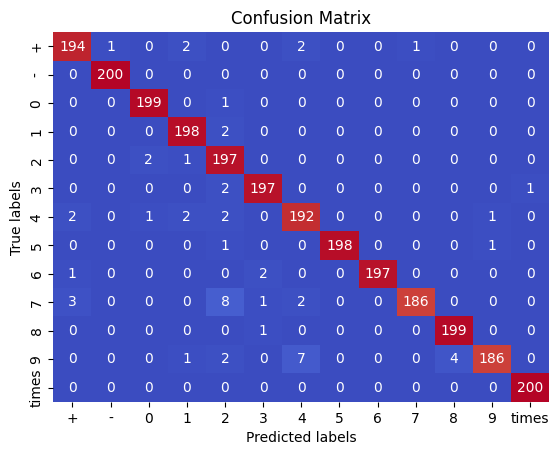

In [25]:
# plot confusion matrix heatmap

sns.heatmap(cm, annot=True, fmt='g', yticklabels=labels, xticklabels=labels, cbar=False, cmap='coolwarm')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix'); 